## This linear regression model aims to predict daily offense totals based on the predictors: year-week, average daily temperatures, and month of the year (1-12)

In [1]:
# import appropriate libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [2]:
# read in offenses, weather,and liquor license data
off_data = pd.read_csv('../Data/OffensesData.csv')
wea_data = pd.read_csv('../Data/NOAAWeatherDataDIA.csv')
liq_data = pd.read_csv('../Data/LiquorLicenses.csv')

In [3]:
# prepare an aggregate variable containing total active liquor licenses by district and total offenses per day
tot_dist_lic = liq_data['POLICE_DIST'].value_counts().sort_index()
tot_daily_off = off_data['Occ Date'].value_counts().sort_index()

In [4]:
# put the appropriate external variables into the offenses dataset and keep only unique dates
step1 = off_data.merge(wea_data, how='inner', left_on='Occ Date', right_on='DATE')
step2 = pd.DataFrame({'District': tot_dist_lic.index,
                      'Total Licenses': tot_dist_lic.values})
step3 = step1.merge(step2, on='District')
step4 = pd.DataFrame({'Occ Date': tot_daily_off.index,
                      'Total Offenses': tot_daily_off.values})
step5 = step3.merge(step4, on='Occ Date')
df = step5.drop_duplicates(['Occ Date'])

In [5]:
# slice the data to get the predictors and convert the 'Year-Week' categorical data to dummies
df_predictors = df[['Year-Week', 'DAILYAverageDryBulbTemp', 'Occ Date: Month']]
cols_to_transform = ['Year-Week']
df_with_dummies = pd.get_dummies(df_predictors, columns=cols_to_transform)

In [6]:
# store the predictos(including dummies for 'Year-Week') and response variables into x and y
x = df_with_dummies
y = df['Total Offenses']

# create the train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [7]:
# create and train the linear regression model
linreg = linear_model.LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

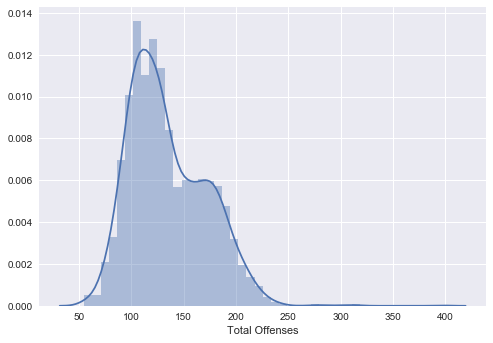

Linear Regression Model Output
------------------------------
R-Square: 0.509363638339


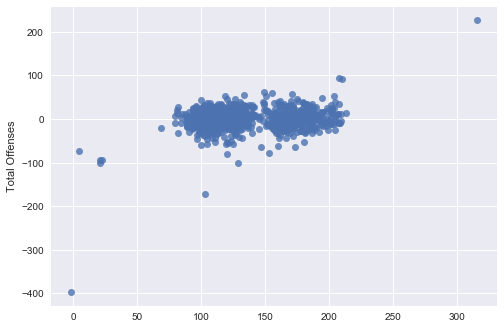

In [8]:
# show the distribution of observed response values, print the R^2 of the linear regression model, 
# and show the residual plot resulting from model predictions
sns.distplot(df['Total Offenses'])
sns.plt.show()
print 'Linear Regression Model Output'
print '------------------------------'
print 'R-Square: ' + str(linreg.score(x_test, y_test))
sns.regplot(linreg.predict(x_test), linreg.predict(x_test) - y_test, fit_reg=False)
sns.plt.show()